In [1]:
import pandas as pd     
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


## Data Analysis:

In [211]:
df = pd.read_csv(r"C:\Users\oscar\OneDrive\Escritorio\Oscar\Curso The Bridge Data Science\Data_Heart_Failure 3\train_strokes.csv")

df.head()





,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


<AxesSubplot:xlabel='hypertension', ylabel='count'>

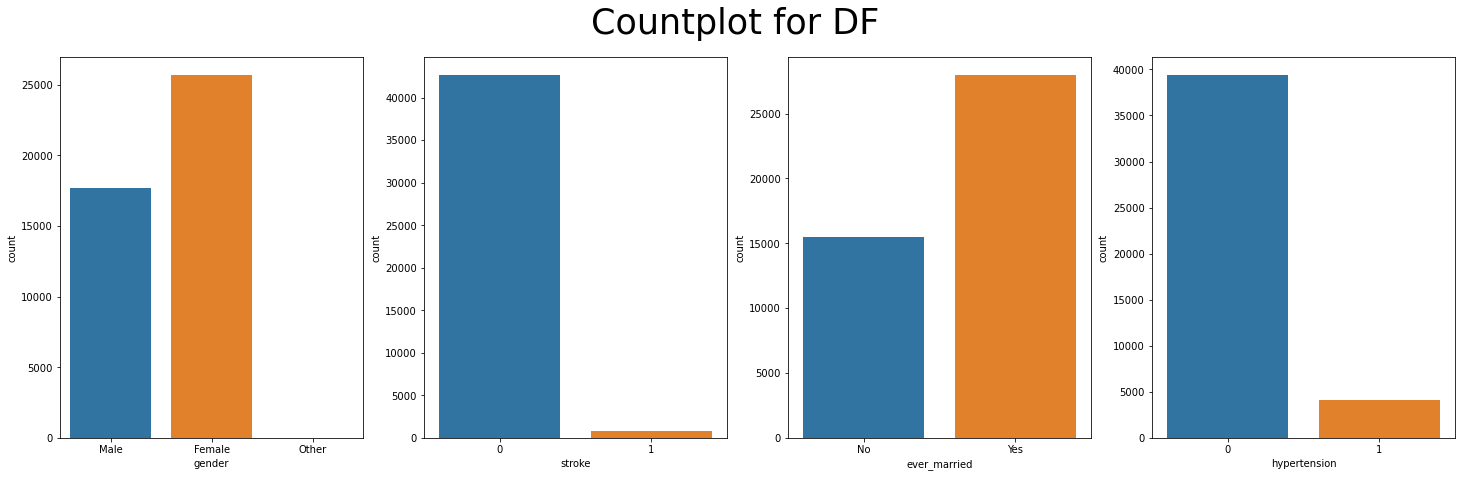

In [212]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(25,7))
fig.suptitle("Countplot for DF", fontsize=35)

sns.countplot(x="gender", data=df,ax=ax1,)
sns.countplot(x="stroke", data=df,ax=ax2)
sns.countplot(x="ever_married", data=df,ax=ax3)
sns.countplot(x="hypertension", data=df,ax=ax4)

<AxesSubplot:ylabel='Count'>

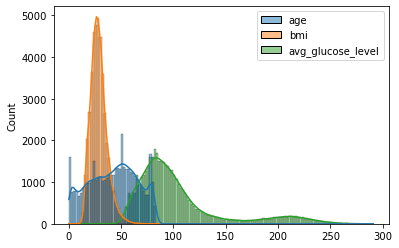

In [182]:
var_cont = ['age','bmi','avg_glucose_level']

sns.histplot(df[var_cont], kde=True)

<AxesSubplot:xlabel='stroke', ylabel='age'>

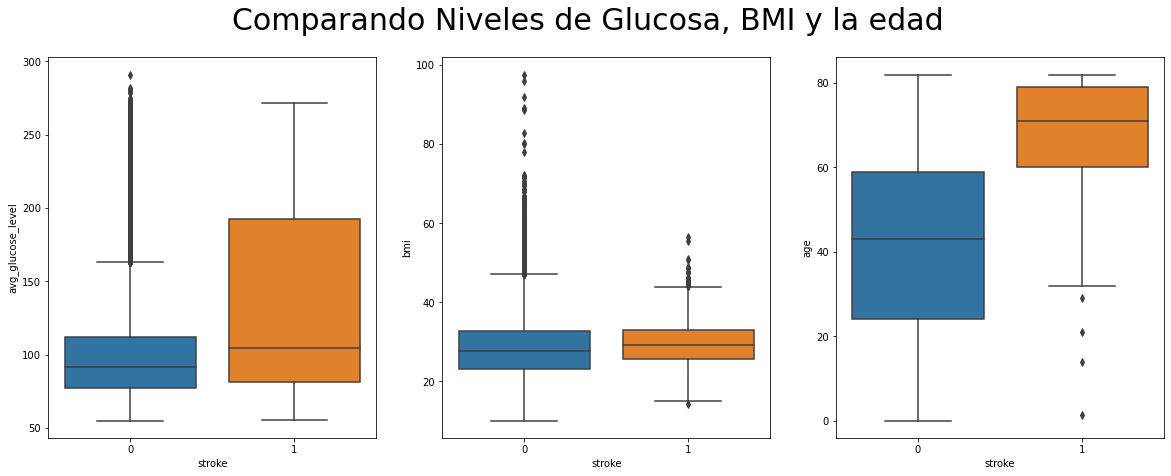

In [187]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,7))
fig.suptitle("Comparando Niveles de Glucosa, BMI y la edad", fontsize=30)

sns.boxplot(x="stroke", y="avg_glucose_level" , data=df,ax=ax1)
sns.boxplot(x="stroke", y="bmi", data=df,ax=ax2)
sns.boxplot(x="stroke", y="age", data=df,ax=ax3)

In [188]:
temp = df
temp['stroke'] = temp['stroke'].astype(int)
smoking_status_df = temp.groupby(["smoking_status"])['stroke'].agg(['sum','count']).reset_index()
smoking_status_df['risk'] = smoking_status_df['sum'] / smoking_status_df['count'] * 100
smoking_status_df

# Vemos que el riesgo incrementa cuando las personas fuman 

,smoking_status,sum,count,risk
0,formerly smoked,221,7493,2.949419
1,never smoked,284,16053,1.769140
2,smokes,133,6562,2.026821


<AxesSubplot:xlabel='stroke', ylabel='age'>

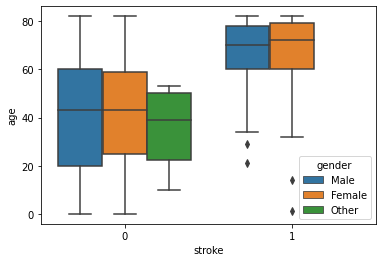

In [189]:
sns.boxplot(x="stroke", y="age", hue="gender",data=df)

#podemos observar que 

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

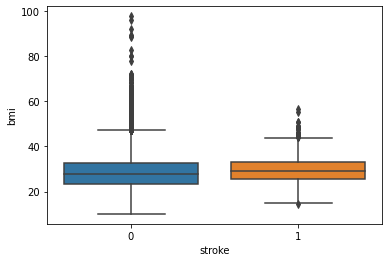

In [190]:
sns.boxplot(x="stroke", y="bmi",data=df)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [210]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'group_age'],
      dtype='object')

In [209]:
df.shape

(43400, 13)

### Analizamos y tratamos los missings:

In [223]:
missing = round(df.isnull().sum()*100/len(df),2)

missing

# Podemos observar que la columna de BMI y de Smoking_Status tienen algunos missings



gender                0.00
age                   0.00
hypertension          0.00
heart_disease         0.00
ever_married          0.00
work_type             0.00
Residence_type        0.00
avg_glucose_level     0.00
bmi                   3.37
smoking_status       30.63
stroke                0.00
dtype: float64

In [224]:
# Eliminamos las filas con Missings

df = df.dropna()

In [225]:
# Analizamos nuevamente el DF

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29072 entries, 1 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             29072 non-null  object 
 1   age                29072 non-null  float64
 2   hypertension       29072 non-null  int64  
 3   heart_disease      29072 non-null  int64  
 4   ever_married       29072 non-null  object 
 5   work_type          29072 non-null  object 
 6   Residence_type     29072 non-null  object 
 7   avg_glucose_level  29072 non-null  float64
 8   bmi                29072 non-null  float64
 9   smoking_status     29072 non-null  object 
 10  stroke             29072 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 2.7+ MB


### Eliminamos la Columna 'ID' ya que no aporta valor para el modelo

In [215]:
df = df.drop(columns=['id'])
'''Aqui elimine la columna pero solo puedo ejecutarla una vez es por eso que la dejamos como comentario'''

df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


## Correlacion Lineal

In [141]:
#Verificamos la correlacion lineal de los datos

corr = np.abs(df.corr()['stroke']).sort_values(ascending=False)
print(corr)


stroke               1.000000
age                  0.154060
heart_disease        0.105149
hypertension         0.078684
avg_glucose_level    0.075452
bmi                  0.004029
Name: stroke, dtype: float64


In [96]:
## Aqui he intentado eliminar las columnas que se ven debajo pero el modelo ha resultado con un peor resultado lo dejo como comentario.

#df = df.drop(columns=['ever_married','heart_disease','work_type','hypertension'])

## dividimos nuestros datos en train y test:

In [226]:

X_train,X_test,y_train,y_test = train_test_split(df.drop('stroke',axis=1)
,df['stroke'],
test_size=0.2,
random_state=42)

X_train2 = X_train.drop(["gender", "ever_married","Residence_type", "work_type", "smoking_status"],axis= 1)

X_train2

,age,hypertension,heart_disease,avg_glucose_level,bmi
4586,46.0,0,0,59.74,29.5
40656,26.0,0,0,102.76,30.2
26850,16.0,0,0,59.59,24.4
34095,71.0,0,0,67.83,31.4
31212,46.0,0,0,93.99,39.7
...,...,...,...,...,...
32178,37.0,0,0,87.40,34.9
8042,35.0,0,0,152.04,24.4
1264,68.0,1,0,95.40,27.5
23493,44.0,0,0,72.99,25.1


In [217]:
#Hacemos un Get Dummies en X Train para las variables cualitativas

X_train = pd.get_dummies(X_train,prefix=['Gender','Married','Work','Residence','Smoke'],drop_first=True)

X_test = pd.get_dummies(X_test,prefix=['Gender','Married','Work','Residence','Smoke'],drop_first=True)

X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,Gender_Male,Gender_Other,Married_Yes,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,Residence_Urban,Smoke_never smoked,Smoke_smokes
12858,73.0,0,0,143.98,28.6,0,0,1,0,1,0,0,0,1,0
10591,26.0,0,0,103.77,23.3,0,0,1,0,1,0,0,0,0,0
26775,19.0,0,0,83.54,22.8,0,0,0,0,1,0,0,1,1,0
6662,34.0,0,0,63.99,25.1,0,0,1,0,1,0,0,1,1,0
19985,42.0,0,0,81.89,42.8,1,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,42.0,0,0,85.00,29.9,1,0,1,0,1,0,0,1,0,1
11284,39.0,0,0,76.54,18.8,0,0,1,0,1,0,0,0,0,0
38158,52.0,0,0,109.70,34.1,1,0,1,0,1,0,0,1,0,0
860,70.0,0,0,223.68,34.3,1,0,1,0,0,1,0,1,0,0


In [127]:
from sklearn.ensemble import RandomForestRegressor

#rf=RandomForestRegressor(n_estimators=100)
#rf.fit(X_train,y_train)

#scores = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), X_train.columns), reverse=True)
#pd.DataFrame(scores, columns=['Score', 'Feature'])

# La hipertension y las enfermedades cardiacas no tienen que ver mucho

'''Esta seleccion se hizo al remover las columnas mencionadas en celdas arriba, sin embargo luego la descarte porque obtuve un scoring y un recall peor'''


In [147]:
X_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,Gender_Male,Gender_Other,Married_Yes,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,Residence_Urban,Smoke_never smoked,Smoke_smokes
6830,35.0,0,0,70.86,25.2,0,0,0,0,0,0,0,0,0,0
15584,65.0,1,1,196.95,41.7,1,0,1,0,0,1,0,1,0,1
9647,45.0,0,0,93.69,34.4,0,0,1,0,1,0,0,0,1,0
12888,29.0,0,0,146.84,39.6,0,0,1,0,1,0,0,0,1,0
33750,30.0,0,0,68.17,33.8,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22798,43.0,0,0,59.00,19.7,0,0,1,0,1,0,0,1,0,1
23454,48.0,0,0,73.84,31.8,0,0,1,0,0,1,0,0,1,0
20387,30.0,0,0,81.82,26.6,1,0,0,0,1,0,0,0,0,0
18754,10.0,0,0,109.17,18.0,0,0,0,0,0,0,1,1,1,0


<AxesSubplot:xlabel='stroke', ylabel='Density'>

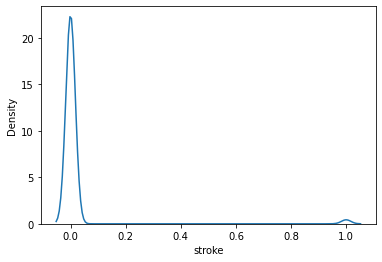

In [14]:


sns.kdeplot(df['stroke'])

#Aqui podemos observar que mis datos no son normales

C:\Users\oscar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


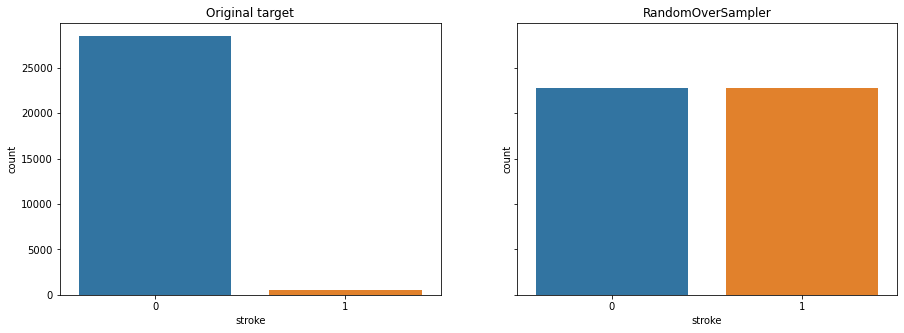

In [162]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_ros, y_ros = ros.fit_resample(X_train, y_train)
fig, axes = plt.subplots(1,2,figsize=(15,5), sharey=True)
# Original target
sns.countplot(x='stroke', data=df, ax=axes[0])
axes[0].set_title("Original target")
# RandomOverSampler
sns.countplot(y_ros, ax=axes[1])
axes[1].set_title("RandomOverSampler");

In [149]:
X_ros

,age,hypertension,heart_disease,avg_glucose_level,bmi,Gender_Male,Gender_Other,Married_Yes,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,Residence_Urban,Smoke_never smoked,Smoke_smokes
0,46.0,0,0,59.74,29.5,1,0,1,0,1,0,0,1,0,1
1,26.0,0,0,102.76,30.2,0,0,0,0,1,0,0,1,0,0
2,16.0,0,0,59.59,24.4,1,0,0,0,1,0,0,1,1,0
3,71.0,0,0,67.83,31.4,0,0,1,0,0,1,0,1,1,0
4,46.0,0,0,93.99,39.7,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45629,57.0,1,0,78.92,27.7,1,0,1,0,0,0,0,1,0,0
45630,59.0,0,0,75.28,23.1,1,0,1,0,0,1,0,0,0,1
45631,77.0,1,0,199.84,28.0,0,0,1,0,0,1,0,1,0,0
45632,58.0,0,0,76.10,36.3,0,0,0,0,0,1,0,0,1,0


## Balanceo de Datos:

### Analizamos la correlacion de los datos: 

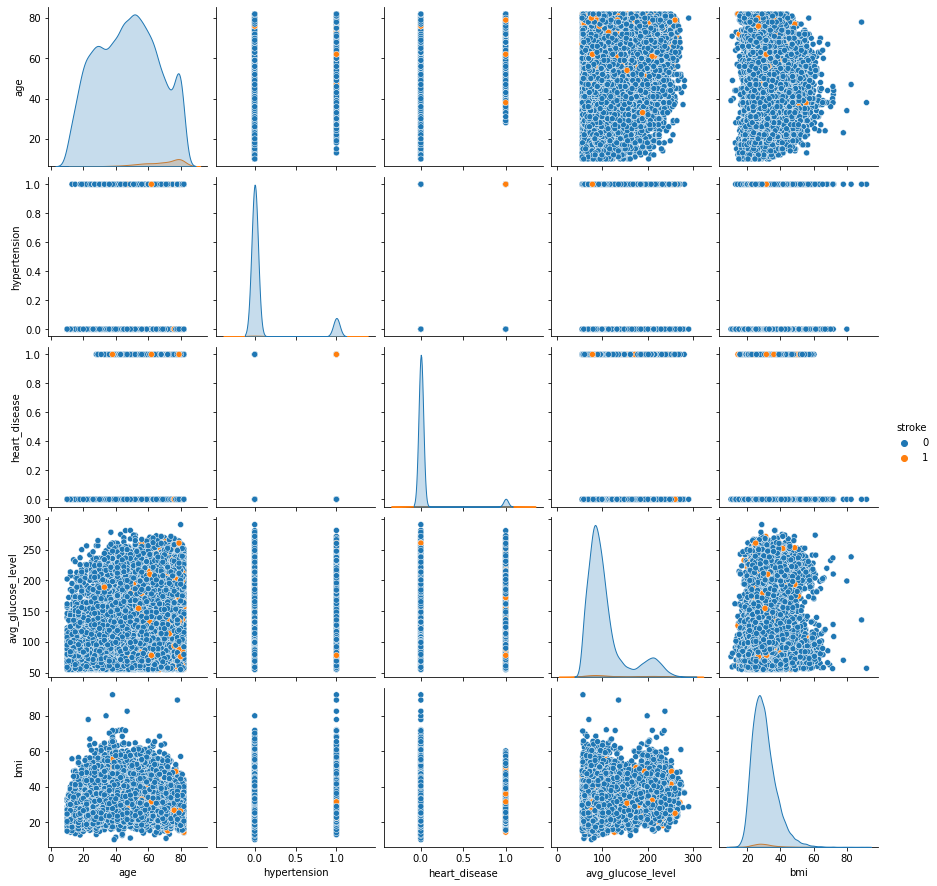

In [54]:
sns.pairplot(df,
            kind='scatter',
            hue='stroke');

C:\Users\oscar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


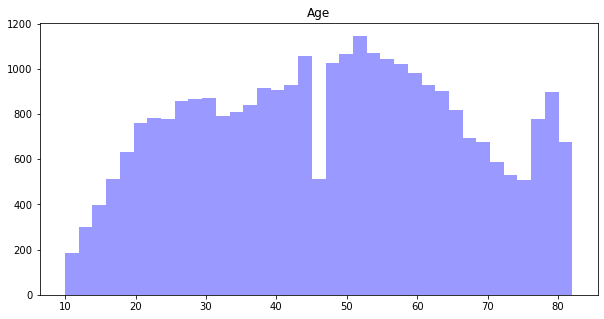

In [17]:
#Revision de las edades a traves de visualizaciones

fig, axes = plt.subplots(figsize=(10,5), sharey=True)

sns.distplot(df[['age']],kde=False,color='b').set_title('Age')


plt.show()

Text(0.5, 1.0, 'Age Histogram')

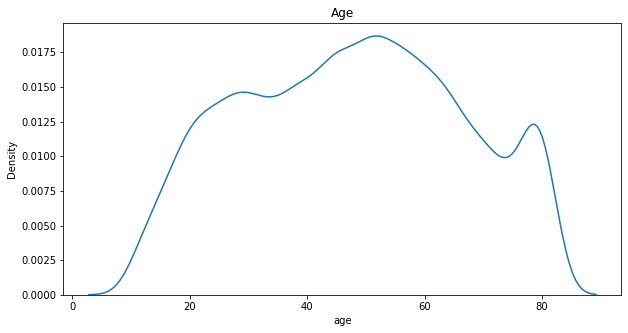

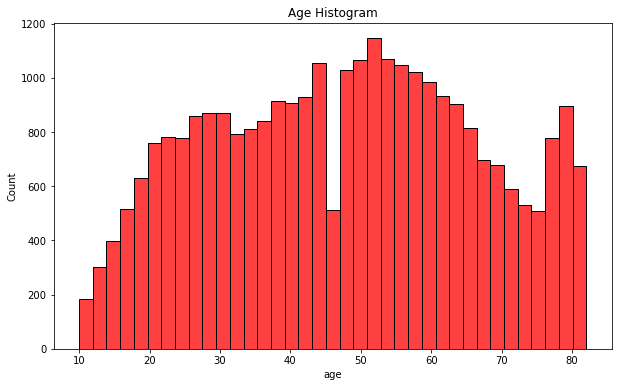

In [18]:
%matplotlib inline
plt.figure(figsize=(10,5))
sns.kdeplot(df['age']).set_title('Age')

plt.figure(figsize =(10,6))
sns.histplot(df['age'],kde = False,color = 'r').set_title('Age Histogram')

# Se puede observar que se tiene una mayor concentracion de los datos en ciertos rangos de edad

In [20]:
#Analizamos los datos de la Glucosa promedio por caso


#plt.figure(figsize=(12,6))
#sns.boxplot(data=df['avg_glucose_level'])

#Podemos observar que la glucosa promedio esta entre los 70 y 120



<AxesSubplot:xlabel='gender', ylabel='count'>

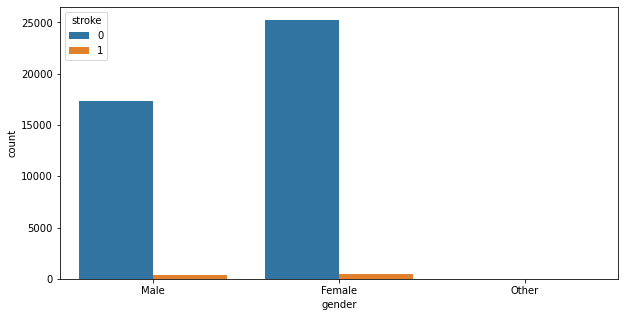

In [131]:
plt.figure(figsize=(10,5))

sns.countplot(x=df['gender'],hue=df['stroke'])

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

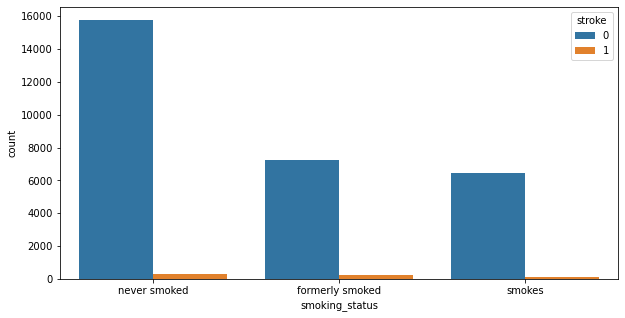

In [11]:
plt.figure(figsize=(10,5))

sns.countplot(x=df['smoking_status'],hue=df['stroke'])



interval columns not set, guessing: ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


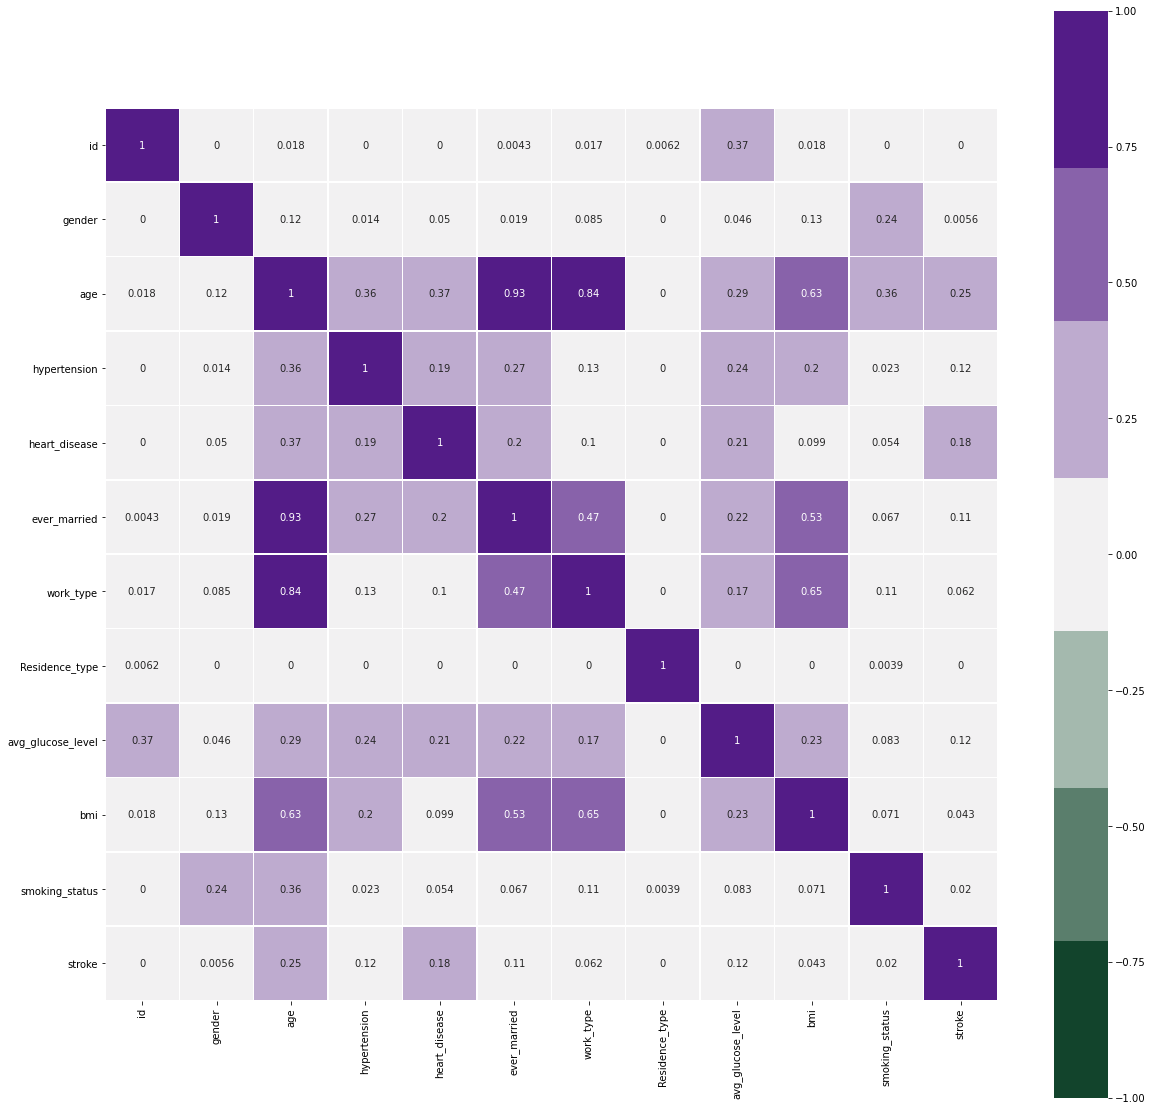

In [20]:
#Ejecutamos una matriz de correlacion para ver la correlacion entre los diferentes datos

#!pip install phik
import phik
phik_matrix = df.phik_matrix()
plt.figure(figsize=(20,20))

sns.heatmap(phik_matrix,
            vmin = -1,
           vmax = 1, 
           center = 0,
           cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot = True,
           square = True,
           linewidths = .5);

<AxesSubplot:xlabel='bmi', ylabel='age'>

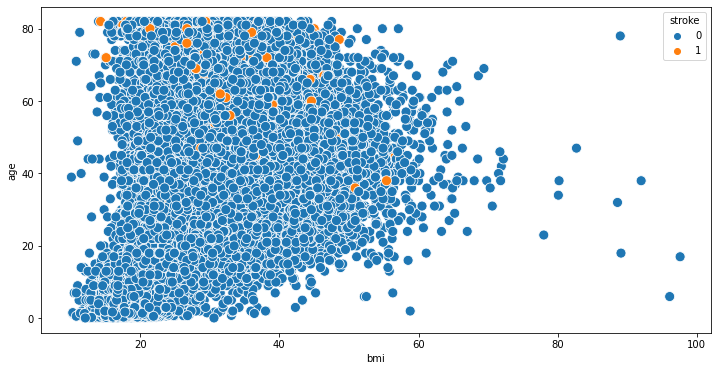

In [13]:
# Analizamos la correlacion del indice de masa corporal con la edad y el infarto
plt.figure(figsize=(12,6))

sns.scatterplot(x=df['bmi'],y=df['age'], s=100,hue=df['stroke'])


### Seleccionamos los modelos de prediccion y los introducimos en el pipeline

In [150]:

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV



In [151]:
rand_forest = RandomForestClassifier()

svm = Pipeline([("scaler",StandardScaler()),
                ("selectkbest",SelectKBest()),
                ("svm",SVC())
               ])

reg_log = Pipeline([("imputer",SimpleImputer()),
                    ("scaler",StandardScaler()),
                    ("reglog",LogisticRegression())
                   ])
grid_random_forest = {'n_estimators': [120],
                        'max_depth': [3,4,5,6,10,15,17],
                        'max_features': ['sqrt',3,4]
                        }
# Parametros de los Modelos

svm_param = {                    
            'selectkbest__k': [1,2,3],
            'svm__C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 
            'svm__kernel': ["linear","poly","rbf"],
            'svm__coef0': [-10.,-1., 0., 0.1, 0.5, 1, 10, 100],
            'svm__gamma': ('scale', 'auto')
            }
reg_log_param = {    
                 "imputer__strategy": ['mean', 'median', 'most_frequent'],
                 "reglog__penalty": ["l1","l2"], 
                 "reglog__C": np.logspace(0, 4, 10)}
                 
# Vamos a almacenar los modelos en un tupla

#modelos = [('Random Forest', rand_forest,grid_random_forest),('SVM',svm,svm_param),('Regresion Log',reg_log,reg_log_param)]

'''He intentado correr los 3 modelos con un for pero mi ordenador no lo ha podido terminar, por lo que quizas pueda buscar oportunidades de mejora 
con mas tiempo, optimizando quizas el modelo o utilizando un mejor ordenador'''

#Hice la prueba con el Random Forest

modelos = [('Random Forest', rand_forest,grid_random_forest)]
modelos_gridsearch = {}


for i in modelos:
    modelos_gridsearch[i[0]] = GridSearchCV(i[1],i[2],cv=10,scoring='accuracy',verbose = 1, n_jobs=1)
    modelos_gridsearch[i[0]].fit(X_ros,y_ros)




Fitting 10 folds for each of 21 candidates, totalling 210 fits


In [153]:
best_grids = [(i, j.best_score_) for i, j in modelos_gridsearch.items()]

best_grids = pd.DataFrame(best_grids, columns=["Grid", "Best score"]).sort_values(by="Best score", ascending=False)
best_grids

,Grid,Best score
0,Random Forest,0.996056


In [155]:
modelos_gridsearch['Random Forest'].best_estimator_

RandomForestClassifier(max_depth=17, max_features=3, n_estimators=120)

### Revisamos el Score en el Test:

In [106]:
modelos_gridsearch['Random Forest'].best_estimator_.score(X_test,y_test)

# Hemos obtenido un buen scoring

0.9712811693895099

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix

In [159]:
Modelo = RandomForestClassifier(n_estimators= 120,max_depth=17,max_features='sqrt')

Modelo.fit(X_ros,y_ros)

pred = Modelo.predict(X_test)

[[5665   42]
 [ 104    4]]


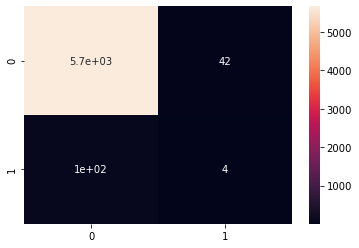

In [161]:
c_matrix = confusion_matrix(y_test,pred)
print(c_matrix)

sns.heatmap(c_matrix, annot = True);

In [160]:
print("Score del modelo:", Modelo.score(X_test, y_test))
print("Accuracy score:", accuracy_score(pred, y_test))
print("Recall score:", recall_score(pred, y_test))
print("Precision score:", precision_score(pred, y_test))
print("F1 score:", f1_score(pred, y_test))
print("AUC:", roc_auc_score(pred, y_test))

Score del modelo: 0.9748925193465177
Accuracy score: 0.9748925193465177
Recall score: 0.08695652173913043
Precision score: 0.037037037037037035
F1 score: 0.051948051948051945
AUC: 0.5344645669884766


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [69]:
arbol = DecisionTreeClassifier(random_state=42,min_samples_leaf=10)

arbol.fit(X_ros,y_ros)

pred2= arbol.predict(X_test)

print("Score del modelo:", arbol.score(X_test, y_test))
print("Accuracy score:", accuracy_score(pred2, y_test))
print("Recall score:", recall_score(pred2, y_test))

# Podemos observar que un Arbol de Decision tiene un peor score y peor recall

Score del modelo: 0.9272570937231298
Accuracy score: 0.9272570937231298
Recall score: 0.04081632653061224


### Probando otros modelos

In [75]:
reg_log1 = Pipeline([
    ("scaler", StandardScaler()),
    ("reglog", LogisticRegression())
])
reg_log_param = {
    "reglog__penalty": ['l1', 'l2'],
    "reglog__C": np.arange(0.1, 1, 0.1)
}

gs_reg_log = GridSearchCV(reg_log1,reg_log_param,cv=10,verbose=1,n_jobs=1)

grids1 = {'gs_reg_log':gs_reg_log}

for i,j in grids1.items():
    j.fit(X_ros,y_ros)



Fitting 10 folds for each of 18 candidates, totalling 180 fits


C:\Users\oscar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\oscar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\oscar\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\oscar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\oscar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

In [76]:
gs_reg_log.best_estimator_


Pipeline(steps=[('scaler', StandardScaler()),
                ('reglog', LogisticRegression(C=0.1))])

In [77]:
gs_reg_log.best_estimator_.score(X_test,y_test)


0.7313843508168529

In [79]:
pred3 = gs_reg_log.best_estimator_.predict(X_test)

print("Recall score:", recall_score(pred3, y_test))

# Podemos observar que el mejor modelo es el de Random Forest ya que obtuvo un Accuracy de 0.97

Recall score: 0.05343980343980344


In [236]:
# Probamos el KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

X_ros2, y_ros2 = ros.fit_resample(X_train2, y_train)

X_ros2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45634 entries, 0 to 45633
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45634 non-null  float64
 1   hypertension       45634 non-null  int64  
 2   heart_disease      45634 non-null  int64  
 3   avg_glucose_level  45634 non-null  float64
 4   bmi                45634 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 1.7 MB


In [237]:
knn.fit(X_ros2,y_ros2)


KNeighborsClassifier()

In [238]:
X_test2 = X_test.drop(["gender", "ever_married","Residence_type", "work_type", "smoking_status"],axis= 1)

X_test2

,age,hypertension,heart_disease,avg_glucose_level,bmi
6830,35.0,0,0,70.86,25.2
15584,65.0,1,1,196.95,41.7
9647,45.0,0,0,93.69,34.4
12888,29.0,0,0,146.84,39.6
33750,30.0,0,0,68.17,33.8
...,...,...,...,...,...
22798,43.0,0,0,59.00,19.7
23454,48.0,0,0,73.84,31.8
20387,30.0,0,0,81.82,26.6
18754,10.0,0,0,109.17,18.0


In [239]:
pred4 = knn.predict(X_test2)

In [241]:
print("Score del modelo:", knn.score(X_test2, y_test))
print("Accuracy score:", accuracy_score(pred4, y_test))
print("Recall score:", recall_score(pred4, y_test))
print("Precision score:", precision_score(pred4, y_test))


Score del modelo: 0.9375752364574377
Accuracy score: 0.9375752364574377
Recall score: 0.06779661016949153
Precision score: 0.18518518518518517
